In [2]:
import yaml
import sys
import os
import random
import torch
import numpy as np

from PIL import Image
from torchvision import transforms
from torchvision.transforms import functional as F

In [3]:
# Add the project root directory to Python path
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
from data.dataset import CrackDataset
from data.transforms import (Compose, ToTensor, Normalize, Resize,
                        RandomHorizontalFlip, RandomVerticalFlip)

## Carga de imágenes

In [5]:
with open('../configs/default.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [6]:
dataset_path = config['paths']['dataset_path']

images_dir = dataset_path + '/images'
masks_dir = dataset_path + '/masks'

In [7]:
dataset = CrackDataset(images_dir=images_dir, masks_dir=masks_dir)

In [8]:
print(len(dataset))

1126


In [9]:
rand_num = random.randint(0, len(dataset))
dataset.images[rand_num]

'391_2.jpg'

In [10]:
dataset.masks[rand_num]

'391_2.png'

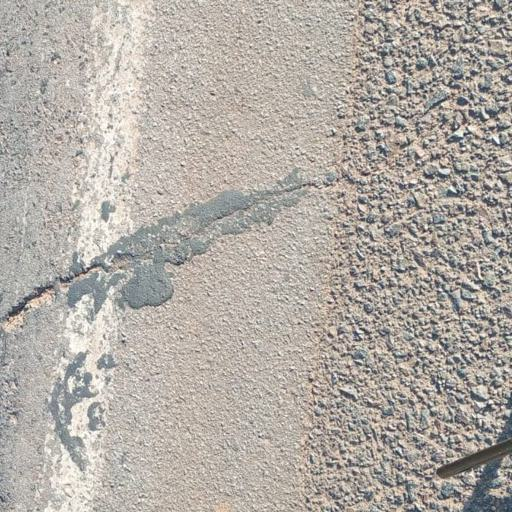

In [11]:
# Imagen
img = dataset[rand_num][0]
img

In [12]:
img.size, np.array(img).shape

((512, 512), (512, 512, 3))

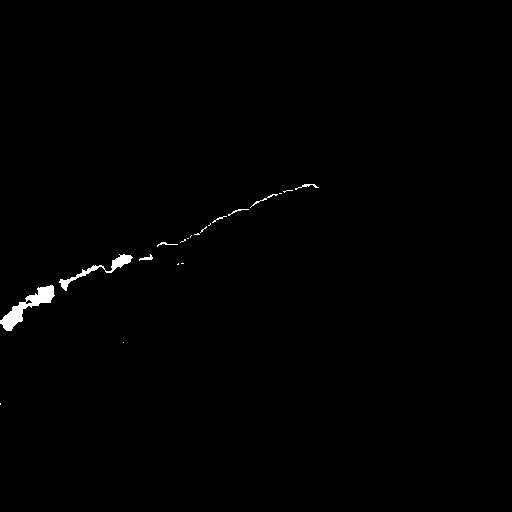

In [13]:
# Máscara
mask = dataset[rand_num][1]
mask

In [14]:
mask_numpy = np.array(mask)

In [15]:
np.unique(mask_numpy)

array([  0, 255], dtype=uint8)

In [16]:
mask_norm = mask_numpy / 255
np.unique(mask_norm)

array([0., 1.])

## Prueba de transformaciones

In [47]:
torch.manual_seed(17)

In [48]:
transf = Compose([
    ToTensor(),  # Primero convertimos a tensor
    Resize((256, 512)),  # Luego redimensionamos como tensor
    RandomHorizontalFlip(),  # Volteamos el tensor
    # RandomVerticalFlip(),
    # Normalize()  # Normalizamos al final
])

In [49]:
d2 = CrackDataset(images_dir=train_img_dir, masks_dir=train_mask_dir, transform=transf)

In [50]:
i2, m2 = d2[rand_num]  # IMPORTANTE: hay que llamar una sola vez al dataset

Horizontal flip applied


In [51]:
# Verificación de tipo de datos
type(i2), type(m2)

(torch.Tensor, torch.Tensor)

In [52]:
i2.shape, m2.shape

(torch.Size([3, 256, 512]), torch.Size([1, 256, 512]))

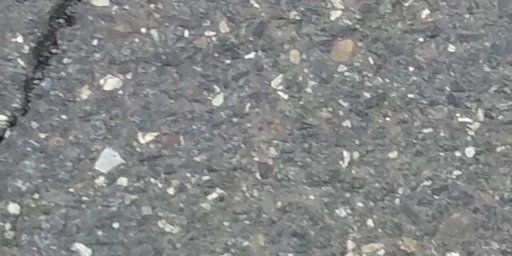

In [53]:
img_pil = F.to_pil_image(i2)
img_pil

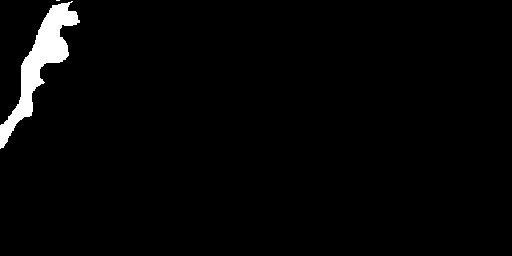

In [54]:
# For a mask tensor with shape [1, H, W]
mask_pil = F.to_pil_image(m2)
mask_pil

In [24]:
mask_tensor = transforms.ToTensor()(mask_pil)
mask_tensor.shape

torch.Size([1, 256, 512])

In [25]:
torch.flip(mask_tensor, dims=[-1]).shape

torch.Size([1, 256, 512])

In [26]:
m2.squeeze(0).numpy().shape

(256, 512)

In [27]:
(Image.fromarray((m2.squeeze(0).numpy() * 255).astype(np.uint8))).size

(512, 256)

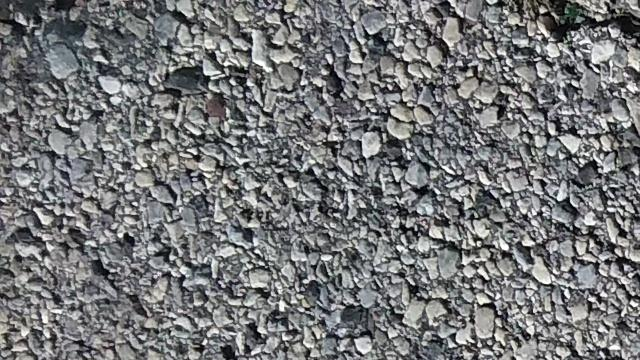

In [28]:
img

In [29]:
bool = torch.rand(1) < .5
if bool:
    print(bool)
    print('flip')

tensor([True])
flip


In [30]:
random.random

<function Random.random()>

In [56]:
print("Falso") if torch.tensor([False]) else print("Verdadero")

Verdadero
